In [1]:
#import the libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#create a function that reads the data from a PLQY file
def read_data(file):
    if file.endswith('.asc'):
        df = pd.read_csv(file, on_bad_lines='skip', sep="\t", skiprows=90, header=None)
    elif file.endswith('.csv'):
        df = pd.read_csv(file, on_bad_lines='skip', sep=", ", skiprows=1, header=None)
    return df

def pre_treat_asc(df):
    df.columns = ['wavelength', 'intensity']
    #divide the intensity by 100
    df['intensity'] = df['intensity']/100
    return df

C:\Users\Lucas\Documents\1.EPFL\MA4\PdS\PV_lab_PdS\UV_VIS\w1\10_TR.Sample.csv
C:\Users\Lucas\Documents\1.EPFL\MA4\PdS\PV_lab_PdS\UV_VIS\w2\10_TR.Sample.asc


C:\Users\Lucas\AppData\Local\Temp\ipykernel_17620\1281829734.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file, on_bad_lines='skip', sep=", ", skiprows=1, header=None)


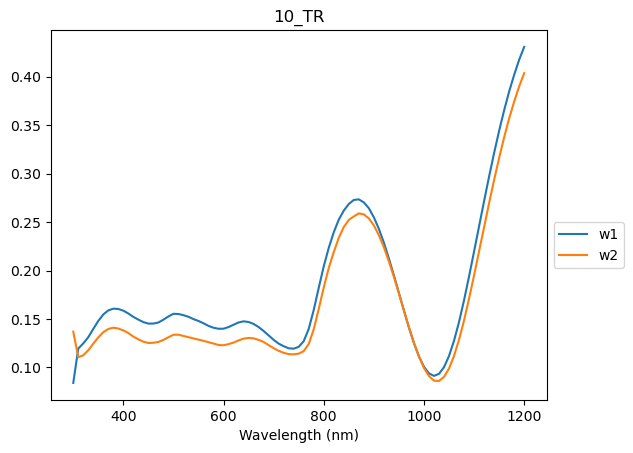

In [14]:
file_2 = "10_TR"
#for each folder in the UV_VIS folder, do the following:
#1. read the file the has file_2 in the name
#2. plot the data

# Path: plot_uv.ipynb

import os
import glob

path = "C:\\Users\\Lucas\\Documents\\1.EPFL\\MA4\\PdS\\PV_lab_PdS\\UV_VIS"
folders = os.listdir(path)

for folder in folders:
    files = glob.glob(path + "\\" + folder + "\\" + file_2 + "*")
    for file in files:
        print(file)
        df = pre_treat_asc(read_data(file))
        plt.plot(df['wavelength'], df['intensity'])

#add the legend to the left
plt.legend(folders, loc='upper left', bbox_to_anchor=(1, 0.5));

#add the labels to the axes
plt.xlabel('Wavelength (nm)');

#add a title to the plot with the name of the file
plt.title(file_2);